[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/filtering_operators.ipynb)
[![Huggin Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue.svg)](https://huggingface.co/spaces/kornia/kornia-image-filtering)

# Filtering Operators

In this tutorial we are going to learn how to apply blurring filters to images with `kornia.filters` components.

In [ ]:
%%capture
!pip install kornia

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/drslump.jpg"
download_image(url)

'drslump.jpg'

In [ ]:
import cv2
import kornia as K
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt

We use OpenCV to load an image to memory represented in a numpy.ndarray

In [ ]:
img_bgr: np.ndarray = cv2.imread("drslump.jpg", cv2.IMREAD_COLOR)

Convert the numpy array to torch

In [ ]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)  # CxHxWx
x_bgr = x_bgr[None, ...].float() / 255.0

x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

In [ ]:
def imshow(input: torch.Tensor):
    if input.shape != x_rgb.shape:
        input = K.geometry.resize(input, size=(x_rgb.shape[-2:]))
    out = torch.cat([x_rgb, input], dim=-1)
    out = torchvision.utils.make_grid(out, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis("off")
    plt.show()

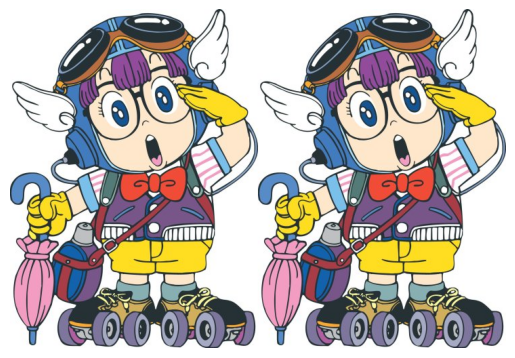

In [ ]:
imshow(x_rgb)

## Box Blur

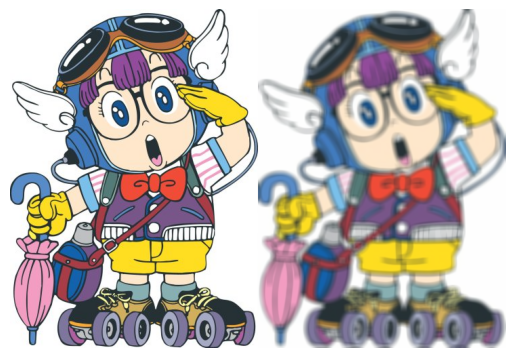

In [ ]:
x_blur: torch.Tensor = K.filters.box_blur(x_rgb, (9, 9))
imshow(x_blur)

## Blur Pool

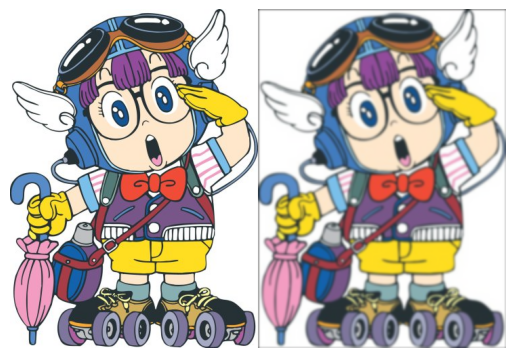

In [ ]:
x_blur: torch.Tensor = K.filters.blur_pool2d(x_rgb, kernel_size=9)
imshow(x_blur)

## Gaussian Blur

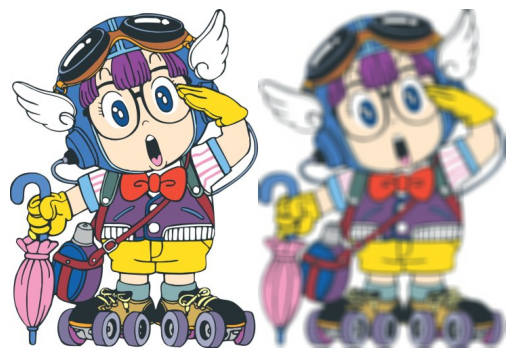

In [ ]:
x_blur: torch.Tensor = K.filters.gaussian_blur2d(x_rgb, (11, 11), (11.0, 11.0))
imshow(x_blur)

## Max Pool

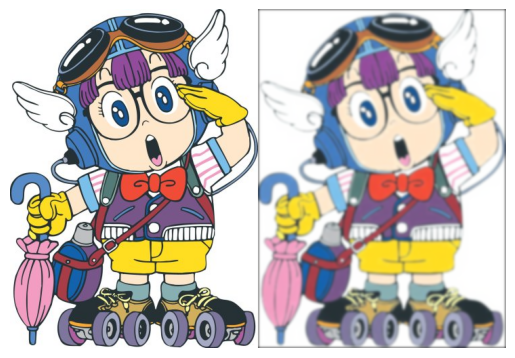

In [ ]:
x_blur: torch.Tensor = K.filters.max_blur_pool2d(x_rgb, kernel_size=11)
imshow(x_blur)

## Median Blur

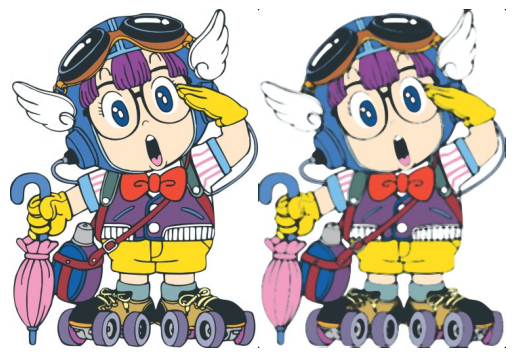

In [ ]:
x_blur: torch.Tensor = K.filters.median_blur(x_rgb, (5, 5))
imshow(x_blur)

## Motion Blur

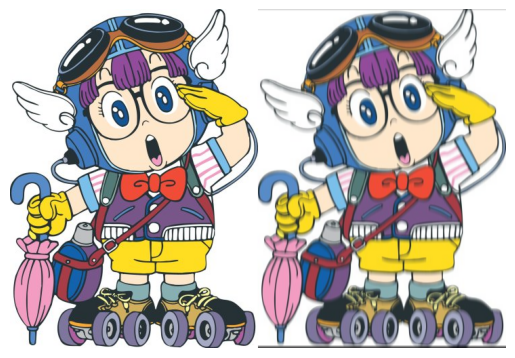

In [ ]:
x_blur: torch.Tensor = K.filters.motion_blur(x_rgb, 9, 90.0, 1)
imshow(x_blur)